In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'GBP'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '62a8dc38-1fa7-430c-88c0-6b4e4dfcbe56',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.GBP.price,quote.GBP.volume_24h,quote.GBP.volume_change_24h,quote.GBP.percent_change_1h,quote.GBP.percent_change_24h,quote.GBP.percent_change_7d,quote.GBP.percent_change_30d,quote.GBP.percent_change_60d,quote.GBP.percent_change_90d,quote.GBP.market_cap,quote.GBP.market_cap_dominance,quote.GBP.fully_diluted_market_cap,quote.GBP.tvl,quote.GBP.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9812,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.919620e+07,1.919620e+07,NaN,1,NaN,NaN,None,2022-11-02T10:16:00.000Z,17767.064845,3.331091e+10,-14.4426,-0.442296,-1.489132,-3.132369,6.597853,2.847142,-10.942710,3.410601e+11,39.0681,3.731084e+11,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
1,1027,Ethereum,ETH,ethereum,6167,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-11-02T10:16:00.000Z,1346.830796,1.277093e+10,-20.0725,-1.522720,-3.846599,-1.164247,19.886278,-0.559181,-4.900128,1.648169e+11,18.8875,1.648169e+11,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
2,825,Tether,USDT,tether,41480,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.941993e+10,7.214177e+10,NaN,3,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.870196,4.834857e+10,-15.7517,-0.102812,-0.449695,-2.412754,-0.009759,-0.013193,-0.024890,6.040897e+10,6.9143,6.277750e+10,None,2022-11-02T10:17:24.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-02 10:17:52.426164
3,1839,BNB,BNB,bnb,1132,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599779e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-11-02T10:16:00.000Z,276.841168,1.015873e+09,-41.9657,-1.039997,-2.810429,7.663089,11.538236,15.119062,5.448570,4.428847e+10,5.0692,5.536823e+10,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
4,3408,USD Coin,USDC,usd-coin,6644,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.302379e+10,4.302379e+10,NaN,5,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.870166,2.771226e+09,-28.1700,-0.128633,-0.475735,-2.400874,-0.005838,-0.015872,-0.013445,3.743785e+10,4.2851,3.743785e+10,None,2022-11-02T10:17:24.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-02 10:17:52.426164
5,52,XRP,XRP,xrp,831,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.008541e+10,9.998924e+10,NaN,6,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.394188,1.029988e+09,-16.3968,-1.325611,-2.606436,-4.826507,1.908407,37.798911,22.637024,1.974307e+10,2.2598,3.941881e+10,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
6,4687,Binance USD,BUSD,binance-usd,5373,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.165867e+10,2.165867e+10,NaN,7,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.870364,5.882050e+09,-17.1996,-0.107296,-0.492718,-2.432843,-0.036213,0.018347,0.007385,1.885093e+10,2.1576,1.885093e+10,None,2022-11-02T10:17:24.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-11-02 10:17:52.426164
7,74,Dogecoin,DOGE,dogecoin,588,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.113513,4.975973e+09,-27.6589,-5.673987,-15.490263,89.180228,117.053238,110.463866,95.164496,1.505992e+10,1.7237,1.505992e+10,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
8,2010,Cardano,ADA,cardano,585,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.433093e+10,3.510147e+

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'GBP'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '62a8dc38-1fa7-430c-88c0-6b4e4dfcbe56',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'C:\Users\user\Coin Market API Project.csv'):
        df.to_csv(r'C:\Users\user\Coin Market API Project.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\user\Coin Market API Project.csv', mode='a', header=False)

In [24]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API_Runner completed')
    sleep(15) # sleep for 1 minute
exit()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API_Runner completed


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API_Runner completed


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API_Runner completed


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API_Runner completed


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API_Runner completed


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2199: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API_Runner completed


KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.GBP.price,quote.GBP.volume_24h,quote.GBP.volume_change_24h,quote.GBP.percent_change_1h,quote.GBP.percent_change_24h,quote.GBP.percent_change_7d,quote.GBP.percent_change_30d,quote.GBP.percent_change_60d,quote.GBP.percent_change_90d,quote.GBP.market_cap,quote.GBP.market_cap_dominance,quote.GBP.fully_diluted_market_cap,quote.GBP.tvl,quote.GBP.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9812,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.919620e+07,1.919620e+07,NaN,1,NaN,NaN,None,2022-11-02T10:16:00.000Z,17767.064845,3.331091e+10,-14.4426,-0.442296,-1.489132,-3.132369,6.597853,2.847142,-10.942710,3.410601e+11,39.0681,3.731084e+11,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
1,1027,Ethereum,ETH,ethereum,6167,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2022-11-02T10:16:00.000Z,1346.830796,1.277093e+10,-20.0725,-1.522720,-3.846599,-1.164247,19.886278,-0.559181,-4.900128,1.648169e+11,18.8875,1.648169e+11,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
2,825,Tether,USDT,tether,41480,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.941993e+10,7.214177e+10,NaN,3,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.870196,4.834857e+10,-15.7517,-0.102812,-0.449695,-2.412754,-0.009759,-0.013193,-0.024890,6.040897e+10,6.9143,6.277750e+10,None,2022-11-02T10:17:24.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-02 10:17:52.426164
3,1839,BNB,BNB,bnb,1132,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.599779e+08,1.599800e+08,NaN,4,NaN,NaN,None,2022-11-02T10:16:00.000Z,276.841168,1.015873e+09,-41.9657,-1.039997,-2.810429,7.663089,11.538236,15.119062,5.448570,4.428847e+10,5.0692,5.536823e+10,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
4,3408,USD Coin,USDC,usd-coin,6644,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.302379e+10,4.302379e+10,NaN,5,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.870166,2.771226e+09,-28.1700,-0.128633,-0.475735,-2.400874,-0.005838,-0.015872,-0.013445,3.743785e+10,4.2851,3.743785e+10,None,2022-11-02T10:17:24.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-02 10:17:52.426164
5,52,XRP,XRP,xrp,831,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.008541e+10,9.998924e+10,NaN,6,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.394188,1.029988e+09,-16.3968,-1.325611,-2.606436,-4.826507,1.908407,37.798911,22.637024,1.974307e+10,2.2598,3.941881e+10,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
6,4687,Binance USD,BUSD,binance-usd,5373,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.165867e+10,2.165867e+10,NaN,7,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.870364,5.882050e+09,-17.1996,-0.107296,-0.492718,-2.432843,-0.036213,0.018347,0.007385,1.885093e+10,2.1576,1.885093e+10,None,2022-11-02T10:17:24.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-11-02 10:17:52.426164
7,74,Dogecoin,DOGE,dogecoin,588,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.113513,4.975973e+09,-27.6589,-5.673987,-15.490263,89.180228,117.053238,110.463866,95.164496,1.505992e+10,1.7237,1.505992e+10,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
8,2010,Cardano,ADA,cardano,585,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.433093e+10,3.510147e+

In [8]:
df72 = pd.read_csv(r'C:\Users\user\Coin Market API Project.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.GBP.price,quote.GBP.volume_24h,quote.GBP.volume_change_24h,quote.GBP.percent_change_1h,quote.GBP.percent_change_24h,quote.GBP.percent_change_7d,quote.GBP.percent_change_30d,quote.GBP.percent_change_60d,quote.GBP.percent_change_90d,quote.GBP.market_cap,quote.GBP.market_cap_dominance,quote.GBP.fully_diluted_market_cap,quote.GBP.tvl,quote.GBP.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9812,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.919528e+07,1.919528e+07,NaN,1,NaN,NaN,NaN,2022-11-01T11:37:00.000Z,17791.325215,3.875476e+10,30.1369,-0.579230,-1.437240,3.777183,6.804061,2.526132,-12.238225,3.415094e+11,38.6022,3.736178e+11,NaN,2022-11-01T11:38:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 11:39:13.522115
1,1,1027,Ethereum,ETH,ethereum,6165,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2022-11-01T11:37:00.000Z,1379.206052,1.591579e+10,19.2784,-0.821792,-2.442640,15.331880,22.394713,0.381586,-4.369946,1.687788e+11,19.0749,1.687788e+11,NaN,2022-11-01T11:38:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 11:39:13.522115
2,2,825,Tether,USDT,tether,41451,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.941993e+10,7.214177e+10,NaN,3,NaN,NaN,NaN,2022-11-01T11:37:00.000Z,0.866168,5.692864e+10,17.9865,-0.106937,-0.475042,-2.409404,-0.017800,-0.014411,-0.030658,6.012936e+10,6.7912,6.248692e+10,NaN,2022-11-01T11:38:24.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-01 11:39:13.522115
3,3,1839,BNB,BNB,bnb,1132,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",2.000000e+08,1.599782e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2022-11-01T11:37:00.000Z,281.451427,1.643231e+09,8.7001,-0.453641,-1.589827,15.965550,14.922379,16.873073,11.616887,4.502609e+10,5.0866,5.629029e+10,NaN,2022-11-01T11:38:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 11:39:13.522115
4,4,3408,USD Coin,USDC,usd-coin,6639,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.360043e+10,4.360043e+10,NaN,5,NaN,NaN,NaN,2022-11-01T11:37:00.000Z,0.866182,3.774541e+09,21.5368,-0.125358,-0.466167,-2.413699,-0.025796,-0.008510,-0.026328,3.776592e+10,4.2664,3.776592e+10,NaN,2022-11-01T11:38:24.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-01 11:39:13.522115
5,5,52,XRP,XRP,xrp,830,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.008541e+10,9.998924e+10,NaN,6,NaN,NaN,NaN,2022-11-01T11:37:00.000Z,0.399241,1.231951e+09,23.4784,-0.849001,-0.117555,0.425304,-0.299636,40.163603,23.400050,1.999614e+10,2.2590,3.992408e+10,NaN,2022-11-01T11:38:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 11:39:13.522115
6,6,4687,Binance USD,BUSD,binance-usd,5367,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,2.139487e+10,2.139487e+10,NaN,7,NaN,NaN,NaN,2022-11-01T11:37:00.000Z,0.866322,6.993866e+09,21.0686,-0.172120,-0.536005,-2.438910,-0.003135,-0.000025,0.001288,1.853486e+10,2.0939,1.853486e+10,NaN,2022-11-01T11:38:24.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-11-01 11:39:13.522115
7,7,74,Dogecoin,DOGE,dogecoin,588,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,NaN,2022-11-01T11:37:00.000Z,0.124329,7.052075e+09,30.9183,-3.625046,17.239280,133.352813,138.861337,133.776841,111.302277,1.649483e+10,1.8634,1.649483e+10,NaN,2022-11-01T11:38:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-01 11:39:13.522115
8,8,2010,Cardano,ADA,cardano,585,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.433097e+10,3.50

In [ ]:
df

In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [23]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.GBP.price,quote.GBP.volume_24h,quote.GBP.volume_change_24h,quote.GBP.percent_change_1h,quote.GBP.percent_change_24h,quote.GBP.percent_change_7d,quote.GBP.percent_change_30d,quote.GBP.percent_change_60d,quote.GBP.percent_change_90d,quote.GBP.market_cap,quote.GBP.market_cap_dominance,quote.GBP.fully_diluted_market_cap,quote.GBP.tvl,quote.GBP.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9812,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19196200.00000,19196200.00000,NaN,1,NaN,NaN,None,2022-11-02T10:16:00.000Z,17767.06485,33310912512.20783,-14.44260,-0.44230,-1.48913,-3.13237,6.59785,2.84714,-10.94271,341060130185.79181,39.06810,373108361753.97180,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
1,1027,Ethereum,ETH,ethereum,6167,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,None,2022-11-02T10:16:00.000Z,1346.83080,12770927987.48078,-20.07250,-1.52272,-3.84660,-1.16425,19.88628,-0.55918,-4.90013,164816887968.05295,18.88750,164816887968.04907,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
2,825,Tether,USDT,tether,41480,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,69419933938.31161,72141766321.72455,NaN,3,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.87020,48348570425.52613,-15.75170,-0.10281,-0.44969,-2.41275,-0.00976,-0.01319,-0.02489,60408968909.84282,6.91430,62777497349.71778,None,2022-11-02T10:17:24.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-11-02 10:17:52.426164
3,1839,BNB,BNB,bnb,1132,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,159977916.08127,159979963.59043,NaN,4,NaN,NaN,None,2022-11-02T10:16:00.000Z,276.84117,1015872575.28039,-41.96570,-1.04000,-2.81043,7.66309,11.53824,15.11906,5.44857,44288473090.85690,5.06920,55368233535.88581,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
4,3408,USD Coin,USDC,usd-coin,6644,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43023788485.18758,43023788485.18758,NaN,5,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.87017,2771226129.46334,-28.17000,-0.12863,-0.47574,-2.40087,-0.00584,-0.01587,-0.01344,37437845884.51074,4.28510,37437845884.51185,None,2022-11-02T10:17:24.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-11-02 10:17:52.426164
5,52,XRP,XRP,xrp,831,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50085407159.00000,99989240406.00000,NaN,6,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.39419,1029987950.61625,-16.39680,-1.32561,-2.60644,-4.82651,1.90841,37.79891,22.63702,19743069008.73478,2.25980,39418805054.45394,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2022-11-02 10:17:52.426164
6,4687,Binance USD,BUSD,binance-usd,5373,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,21658670444.83926,21658670444.83926,NaN,7,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.87036,5882049878.96198,-17.19960,-0.10730,-0.49272,-2.43284,-0.03621,0.01835,0.00739,18850927920.40880,2.15760,18850927920.40649,None,2022-11-02T10:17:24.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-11-02 10:17:52.426164
7,74,Dogecoin,DOGE,dogecoin,588,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,132670764299.89409,132670764299.89409,NaN,8,NaN,NaN,None,2022-11-02T10:16:00.000Z,0.11351,4975972657.21290,-27.65890,-5.67399,-15.49026,89.18023,117.05324,110.46387,95.16450,15059916336.94473,1.72370,15059916336.94087,None,2022-11-02T10:17:24.000Z,NaN,NaN,NaN,NaN,NaN,2

In [10]:
df3 = df.groupby('name', sort=False)[['quote.GBP.percent_change_1h','quote.GBP.percent_change_24h','quote.GBP.percent_change_7d','quote.GBP.percent_change_30d','quote.GBP.percent_change_60d','quote.GBP.percent_change_90d']].mean()
df3

,quote.GBP.percent_change_1h,quote.GBP.percent_change_24h,quote.GBP.percent_change_7d,quote.GBP.percent_change_30d,quote.GBP.percent_change_60d,quote.GBP.percent_change_90d
name,,,,,,
Bitcoin,-0.44230,-1.48913,-3.13237,6.59785,2.84714,-10.94271
Ethereum,-1.52272,-3.84660,-1.16425,19.88628,-0.55918,-4.90013
Tether,-0.10281,-0.44969,-2.41275,-0.00976,-0.01319,-0.02489
BNB,-1.04000,-2.81043,7.66309,11.53824,15.11906,5.44857
USD Coin,-0.12863,-0.47574,-2.40087,-0.00584,-0.01587,-0.01344
XRP,-1.32561,-2.60644,-4.82651,1.90841,37.79891,22.63702
Binance USD,-0.10730,-0.49272,-2.43284,-0.03621,0.01835,0.00739
Dogecoin,-5.67399,-15.49026,89.18023,117.05324,110.46387,95.16450
Cardano,-1.77290,-5.67501,-5.40897,-7.32616,-16.88352,-22.20566


In [11]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.GBP.percent_change_1h     -0.44230
             quote.GBP.percent_change_24h    -1.48913
             quote.GBP.percent_change_7d     -3.13237
             quote.GBP.percent_change_30d     6.59785
             quote.GBP.percent_change_60d     2.84714
             quote.GBP.percent_change_90d   -10.94271
Ethereum     quote.GBP.percent_change_1h     -1.52272
             quote.GBP.percent_change_24h    -3.84660
             quote.GBP.percent_change_7d     -1.16425
             quote.GBP.percent_change_30d    19.88628
             quote.GBP.percent_change_60d    -0.55918
             quote.GBP.percent_change_90d    -4.90013
Tether       quote.GBP.percent_change_1h     -0.10281
             quote.GBP.percent_change_24h    -0.44969
             quote.GBP.percent_change_7d     -2.41275
             quote.GBP.percent_change_30d    -0.00976
             quote.GBP.percent_change_60d    -0.01319
             quote.GBP.percent_change_90

In [12]:
type(df4)

pandas.core.series.Series

In [13]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.GBP.percent_change_1h   -0.44230
            quote.GBP.percent_change_24h  -1.48913
            quote.GBP.percent_change_7d   -3.13237
            quote.GBP.percent_change_30d   6.59785
            quote.GBP.percent_change_60d   2.84714
            quote.GBP.percent_change_90d -10.94271
Ethereum    quote.GBP.percent_change_1h   -1.52272
            quote.GBP.percent_change_24h  -3.84660
            quote.GBP.percent_change_7d   -1.16425
            quote.GBP.percent_change_30d  19.88628
            quote.GBP.percent_change_60d  -0.55918
            quote.GBP.percent_change_90d  -4.90013
Tether      quote.GBP.percent_change_1h   -0.10281
            quote.GBP.percent_change_24h  -0.44969
            quote.GBP.percent_change_7d   -2.41275
            quote.GBP.percent_change_30d  -0.00976
            quote.GBP.percent_change_60d  -0.01319
            quote.GBP.percent_change_90d  -0.02489
BNB         quote.GBP.percent_change_1h   -1.04000
            quote.GBP.percent_change_24h  -2.81043
            quote.GBP.percent_change_7d    7.66309
            quote.GBP.percent_change_30d  11.53824
            quote.GBP.percent_change_60d  15.11906
            quote.GBP.percent_change_90d   5.44857
USD Coin    quote.GBP.percent_change_1h   -0.12863
            quote.GBP.percent_change_24h  -0.47574
            quote.GBP.percent_change_7d   -2.40087
            quote.GBP.percent_change_30d  -0.00584
            quote.GBP.percent_change_60d  -0.01587
            quote.GBP.percent_change_90d  -0.01344
XRP         quote.GBP.percent_change_1h   -1.32561
            quote.GBP.percent_change_24h  -2.60644
            quote.GBP.percent_change_7d   -4.82651
            quote.GBP.percent_change_30d   1.90841
            quote.GBP.percent_change_60d  37.79891
            quote.GBP.percent_change_90d  22.63702
Binance USD quote.GBP.percent_change_1h   -0.10730
            quote.GBP.percent_change_24h  -0.49272
            quote.GBP.percent_change_7d   -2.43284
            quote.GBP.percent_change_30d  -0.03621
            quote.GBP.percent_change_60d   0.01835
            quote.GBP.percent_change_90d   0.00739
Dogecoin    quote.GBP.percent_change_1h   -5.67399
            quote.GBP.percent_change_24h -15.49026
            quote.GBP.percent_change_7d   89.18023
            quote.GBP.percent_change_30d 117.05324
            quote.GBP.percent_change_60d 110.46387
            quote.GBP.percent_change_90d  95.16450
Cardano     quote.GBP.percent_change_1h   -1.77290
            quote.GBP.percent_change_24h  -5.67501
            quote.GBP.percent_change_7d   -5.40897
            quote.GBP.percent_change_30d  -7.32616
            quote.GBP.percent_change_60d -16.88352
            quote.GBP.percent_change_90d -22.20566
Solana      quote.GBP.percent_change_1h   -1.61360
            quote.GBP.percent_change_24h  -5.49769
            quote.GBP.percent_change_7d   -2.41443
            quote.GBP.percent_change_30d  -2.89426
            quote.GBP.percent_change_60d   0.51297
            quote.GBP.percent_change_90d -19.71993
Polygon     quote.GBP.percent_change_1h   -1.32025
            quote.GBP.percent_change_24h  -6.44177
            quote.GBP.percent_change_7d  -13.21691
            quote.GBP.percent_change_30d  10.48426
            quote.GBP.percent_change_60d  -2.68329
            quote.GBP.percent_change_90d  -4.79359
Polkadot    quote.GBP.percent_change_1h   -1.43625
            quote.GBP.percent_change_24h  -5.58190
            quote.GBP.percent_change_7d   -5.64776
            quote.GBP.percent_change_30d   1.52705
            quote.GBP.percent_change_60d -12.82451
            quote.GBP.percent_change_90d -21.81339
Shiba Inu   quote.GBP.percent_change_1h   -2.50886
            quote.GBP.percent_change_24h  -9.91840
            quote.GBP.percent_change_7d   10.67410
            quote.GBP.percent_change_30d   8.15018
            quote.GBP.percent_change_60d  -2.06724
            quo

In [14]:
df5.count()

values    90
dtype: int64

In [15]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.GBP.percent_change_1h,-0.44230
1,Bitcoin,quote.GBP.percent_change_24h,-1.48913
2,Bitcoin,quote.GBP.percent_change_7d,-3.13237
3,Bitcoin,quote.GBP.percent_change_30d,6.59785
4,Bitcoin,quote.GBP.percent_change_60d,2.84714
5,Bitcoin,quote.GBP.percent_change_90d,-10.94271
6,Ethereum,quote.GBP.percent_change_1h,-1.52272
7,Ethereum,quote.GBP.percent_change_24h,-3.84660
8,Ethereum,quote.GBP.percent_change_7d,-1.16425
9,Ethereum,quote.GBP.percent_change_30d,19.88628


In [16]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.GBP.percent_change_1h,-0.44230
1,Bitcoin,quote.GBP.percent_change_24h,-1.48913
2,Bitcoin,quote.GBP.percent_change_7d,-3.13237
3,Bitcoin,quote.GBP.percent_change_30d,6.59785
4,Bitcoin,quote.GBP.percent_change_60d,2.84714
5,Bitcoin,quote.GBP.percent_change_90d,-10.94271
6,Ethereum,quote.GBP.percent_change_1h,-1.52272
7,Ethereum,quote.GBP.percent_change_24h,-3.84660
8,Ethereum,quote.GBP.percent_change_7d,-1.16425
9,Ethereum,quote.GBP.percent_change_30d,19.88628


In [17]:
df7['percent_change'] = df7['percent_change'].replace(['quote.GBP.percent_change_1h','quote.GBP.percent_change_24h','quote.GBP.percent_change_7d','quote.GBP.percent_change_30d','quote.GBP.percent_change_60d','quote.GBP.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.44230
1,Bitcoin,24h,-1.48913
2,Bitcoin,7d,-3.13237
3,Bitcoin,30d,6.59785
4,Bitcoin,60d,2.84714
5,Bitcoin,90d,-10.94271
6,Ethereum,1h,-1.52272
7,Ethereum,24h,-3.84660
8,Ethereum,7d,-1.16425
9,Ethereum,30d,19.88628


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

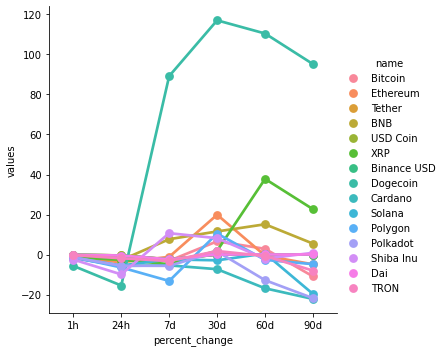

In [19]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [26]:
df8 = df[['name','quote.GBP.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.GBP.price,timestamp
0,Bitcoin,17767.06485,2022-11-02 10:17:52.426164


<AxesSubplot:xlabel='timestamp', ylabel='quote.GBP.price'>

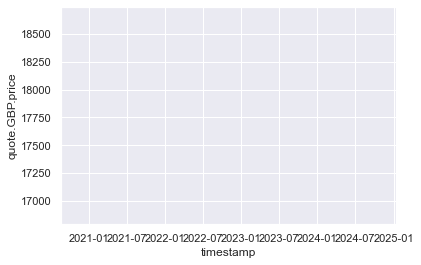

In [30]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.GBP.price', data = df8)